In [ ]:
#dataset creator for stacked indicators and prices and targets
#Python 3.10 first

In [9]:
import pandas as pd
import codecs,csv, talib
import matplotlib.pyplot as plt

In [5]:
forex_data_m1 =pd.read_csv("final_complete_m1short_timestep_4.csv")

In [6]:
forex_data_m5 = pd.read_csv("final_complete_m5short_timestep_4.csv")

In [21]:
len(forex_data_m1) == len(forex_data_m5)

True

In [22]:
forex_data_m1["rsi_12"] = talib.RSI(forex_data_m1["Close"], timeperiod=12)
forex_data_m1["rsi_14"] = talib.RSI(forex_data_m1["Close"], timeperiod=14)
forex_data_m1["mfi"] = talib.MFI(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], forex_data_m1["Volume"], timeperiod=14)
forex_data_m1["adx"] = talib.ADX(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], timeperiod=14)
forex_data_m1["adx_d_plus"] = talib.PLUS_DI(forex_data_m1["High"],forex_data_m1["Low"],forex_data_m1["Close"],timeperiod=14 )
forex_data_m1["adx_d_minus"] = talib.MINUS_DI(forex_data_m1["High"],forex_data_m1["Low"],forex_data_m1["Close"],timeperiod=14 )
forex_data_m1["atr"] = talib.ATR(forex_data_m1["High"],forex_data_m1["Low"],forex_data_m1["Close"],timeperiod=14 )
forex_data_m1["macd_12"] , forex_data_m1["signal"], _= talib.MACD(forex_data_m1["Close"], fastperiod = 12, slowperiod=26, signalperiod = 2)
forex_data_m1["macd_14"] , forex_data_m1["signal"], _= talib.MACD(forex_data_m1["Close"], fastperiod = 14, slowperiod=26, signalperiod = 2)
forex_data_m1["wpr_12"] = talib.WILLR(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], timeperiod=12)
forex_data_m1["wpr_14"] = talib.WILLR(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], timeperiod=14)
forex_data_m1["boll_upper"], forex_data_m1["boll_middle"], forex_data_m1["boll_lower"] = talib.BBANDS(forex_data_m1["Close"], timeperiod = 20, nbdevup = 2, nbdevdn = 2)
forex_data_m1["sto_k_5"], forex_data_m1["sto_d_5"] = talib.STOCH(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], fastk_period = 5, slowk_period = 3, slowd_period=3)
forex_data_m1["sto_k_6"], forex_data_m1["sto_d_6"] = talib.STOCH(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], fastk_period = 6, slowk_period = 3, slowd_period=3)
forex_data_m1["roc"] = talib.ROC(forex_data_m1["Close"], timeperiod=14)
forex_data_m1["cci"] = talib.CCI(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], timeperiod=14)
forex_data_m1["chaikin"] = talib.ADOSC(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], forex_data_m1["Volume"])
forex_data_m1["ad"] = talib.AD(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], forex_data_m1["Volume"])
forex_data_m1["mom"] = talib.MOM(forex_data_m1["Close"], timeperiod=14)


In [33]:
forex_data_m1.columns

Index(['TimeStamp', 'image_path', 'Open', 'Close', 'High', 'Low', 'Ask', 'Bid',
       'MA 5', 'MA 8', 'MA 10', 'MA 14', 'MA 18', 'MA 24', 'MA 30', 'MA 50',
       'MA 100', 'MA 200', 'Stochastic %K', 'Stochastic %D', 'RSI', 'MACD',
       'MACD Signal', 'Volume', 'Spread', 'Account Balance', 'Profit',
       'Take Profit', 'Stop Loss', 'Trailing Stop', 'Lot Size', 'unknown'],
      dtype='object')

In [47]:
from sklearn.preprocessing import MinMaxScaler

# Create a DataFrame with indicator data
indicator_df = pd.DataFrame({
    'rsi_12': list(forex_data_m1.iloc[250:3000]['rsi_12'].values),
    'rsi_14': list(forex_data_m1.iloc[250:3000]['rsi_14'].values),
    'mfi': list(forex_data_m1.iloc[250:3000]['mfi'].values),
    'mom': list(forex_data_m1.iloc[250:3000]['mom'].values),
    'atr': list(forex_data_m1.iloc[250:3000]['atr'].values),
    'adx': list(forex_data_m1.iloc[250:3000]['adx'].values),
    'adx_d_plus': list(forex_data_m1.iloc[250:3000]['adx_d_plus'].values), 
    'adx_d_minus':list(forex_data_m1.iloc[250:3000]['adx_d_minus'].values), 
    'atr' : list(forex_data_m1.iloc[250:3000]['atr'].values), 
    'macd_12':list(forex_data_m1.iloc[250:3000]['macd_12'].values),
    'macd_14':list(forex_data_m1.iloc[250:3000]['macd_14'].values),
    'signal':list(forex_data_m1.iloc[250:3000]['signal'].values), 
    'wpr_12': list(forex_data_m1.iloc[250:3000]['wpr_12'].values),
    'wpr_14': list(forex_data_m1.iloc[250:3000]['wpr_14'].values),
    'sto_d_5':list(forex_data_m1.iloc[250:3000]['sto_d_5'].values), 
    'sto_k_5':list(forex_data_m1.iloc[250:3000]['sto_k_5'].values), 
    'sto_d_6':list(forex_data_m1.iloc[250:3000]['sto_d_6'].values), 
    'sto_k_6':list(forex_data_m1.iloc[250:3000]['sto_k_6'].values),     
    'roc':list(forex_data_m1.iloc[250:3000]['roc'].values), 
    'cci':list(forex_data_m1.iloc[250:3000]['cci'].values), 
    'chaikin':list(forex_data_m1.iloc[250:3000]['chaikin'].values), 
    'ad': list(forex_data_m1.iloc[250:3000]['ad'].values),
    'boll_upper':list(forex_data_m1.iloc[250:3000]['boll_upper'].values),
    'boll_middle':list(forex_data_m1.iloc[250:3000]['boll_middle'].values),
    'boll_lower':list(forex_data_m1.iloc[250:3000]['boll_lower'].values),
    'ask':list(forex_data_m1.iloc[250:3000]["Ask"].values)
    
})

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the indicator data
scaled_data = scaler.fit_transform(indicator_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=indicator_df.columns)

print(scaled_df)

        rsi_12    rsi_14       mfi       mom       atr       adx  adx_d_plus   
0     0.472584  0.495093  0.593558  0.563132  0.421086  0.282508    0.376074  \
1     0.552602  0.567766  0.585307  0.563354  0.388117  0.268630    0.509701   
2     0.502175  0.520339  0.529504  0.527041  0.364770  0.258613    0.517675   
3     0.568481  0.580919  0.606386  0.581566  0.343090  0.249312    0.491263   
4     0.639102  0.646512  0.597940  0.604775  0.366875  0.255955    0.645340   
...        ...       ...       ...       ...       ...       ...         ...   
2745  0.641179  0.639399  0.706231  0.743143  0.617604  0.350361    0.523216   
2746  0.621982  0.621532  0.736801  0.795447  0.551404  0.346513    0.513670   
2747  0.491734  0.498709  0.693497  0.627873  0.534244  0.319875    0.483615   
2748  0.590529  0.593102  0.763060  0.732593  0.518309  0.295140    0.454878   
2749  0.512640  0.518891  0.679824  0.646419  0.503513  0.272172    0.427449   

      adx_d_minus   macd_12   macd_14  

In [48]:
scaled_df.to_csv("scaled_df.csv", index=False)

In [ ]:
#Create the y labels

2750


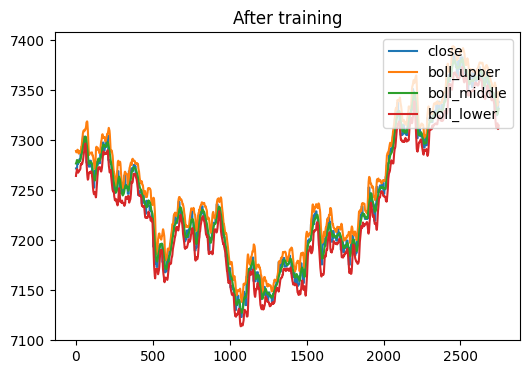

In [49]:
close = list(forex_data_m1.iloc[250:3000]["Open"])
boll_upper = list(indicator_df.iloc[:]["boll_upper"])
boll_middle = list(indicator_df.iloc[:]["boll_middle"])
boll_lower = list(indicator_df.iloc[:]["boll_lower"])
print(len(close))
plt.figure(figsize=(6, 4))
plt.plot(close, label="close")
plt.plot(boll_upper, label="boll_upper")
plt.plot(boll_middle, label="boll_middle")
plt.plot(boll_lower, label="boll_lower")
plt.legend(loc="upper right")
plt.title("After training")
plt.show()

2750


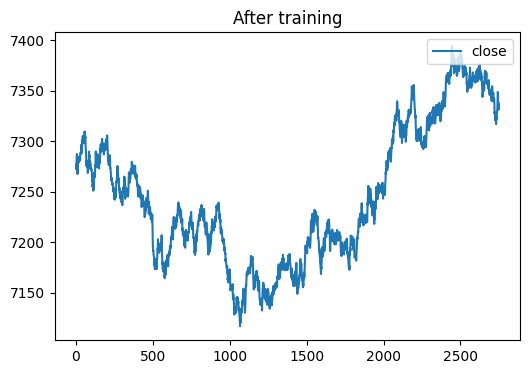

In [50]:
close = list(forex_data_m5.iloc[250:3000]["Close"])
print(len(close))
plt.figure(figsize=(6, 4))
plt.plot(close, label="close")
plt.legend(loc="upper right")
plt.title("After training")
plt.show()

In [51]:
from tabulate import tabulate
headers = ["index", "Ask", "Bid", "Boll_upper", "Boll_middle", "Boll_lower", "status"]
counter = 0
y = []
for i , row in forex_data_m1[250:3000].iterrows():
    r = []
    # print(i, row["Ask"], indicator_df.iloc[counter]["boll_lower"])
    if row["Ask"] > indicator_df.iloc[counter]['boll_middle']:
        status = 0
        y.append(0)
    elif row["Ask"] < indicator_df.iloc[counter]["boll_middle"]:
        status = 1
        y.append(1)
    else:
        status = 1
        y.append(1)
    # r.append([i,row["Ask"], row["Bid"], indicator_df.iloc[counter]["boll_upper"], indicator_df.iloc[counter]["boll_middle"],indicator_df.iloc[counter]["boll_lower"] , status])
    # print(tabulate(r, headers=headers, tablefmt ="grid"))

    counter+=1
    # if counter > 2000:
    #     break

In [52]:
len(y)

2750

In [56]:
scaled_y = pd.DataFrame({
    "y": y
})
scaled_y.to_csv("stacked_y.csv", index=False)

In [57]:
scaled_y.head(5)

,y
0,1
1,0
2,1
3,0
4,0


In [1]:
#from here use python 3.11


import pandas as pd
import numpy as np

# Example indicator data

scaled_df = pd.read_csv("scaled_df.csv")
# Stacking the indicator values
stacked_feature = []
num_indicators = len(scaled_df.columns)
window_size = 10

for i in range(window_size, len(scaled_df)):
    stacked_values = []
    for j in range(num_indicators):
        indicator_values = scaled_df.iloc[i - window_size:i, j].values
        stacked_values.extend(indicator_values)
    stacked_feature.append(stacked_values)

# Convert stacked_feature to a NumPy array
stacked_feature = np.array(stacked_feature)

print(stacked_feature.shape)

(2740, 250)


In [2]:
stacked_feature[0].shape

(250,)

In [3]:
stacked_feature = np.expand_dims(stacked_feature, axis = 0)
stacked_feature.shape

(1, 2740, 250)

In [4]:
stacked_y = pd.read_csv("stacked_y.csv")

In [5]:
len(list(stacked_y.iloc[:2740]["y"]))

2740

In [6]:
y = np.array( list(stacked_y.iloc[:2740]["y"]))
y = y.reshape(1,len(y), 1)
y.shape

(1, 2740, 1)

In [7]:
import numpy as np
import os
from tensorflow import keras
from ncps import wirings
from ncps.tf import LTC
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
wiring = wirings.AutoNCP(8,1) # 8 neurons in total, 1 output (motor neuron)

model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None, 250)),
        # here we could potentially add layers before and after the LTC network
        LTC(wiring, return_sequences=True),
    ]
)
model.compile(
    optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error'
)

model.summary()
hist = model.fit(x=stacked_feature, y=y, batch_size=32, epochs=1000,verbose=1)

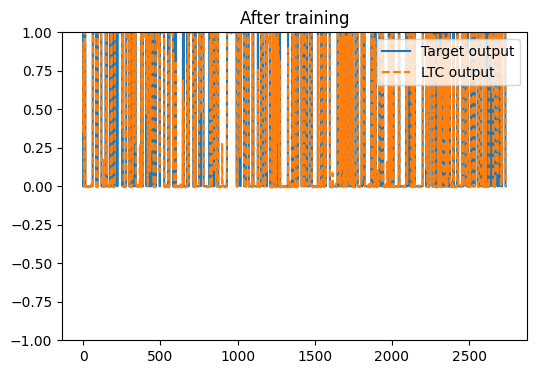

In [9]:
prediction = model(stacked_feature).numpy()
plt.figure(figsize=(6, 4))
plt.plot(y[0, :, 0], label="Target output")
plt.plot(prediction[0, :, 0], label="LTC output",linestyle="dashed")
plt.ylim((-1, 1))
plt.legend(loc="upper right")
plt.title("After training")
plt.show()

In [11]:
forex_data_m1 = pd.read_csv("final_complete_m1short_timestep_4.csv")

In [10]:
_position = 0

stacked_feature.shape

(1, 2740, 250)

In [ ]:
counter = 250
_position = -1
current_trade = {}
total_profit = 0
def trade(entry_price, current_price, _position):
    current_trade = {}
    current_trade["entry_price"] = entry_price
    current_trade["current_price"] = current_price
    current_trade["_position"] = _position
    current_trade["profit"] = 0
    return current_trade
for i in range(0, 2740):
    ask = forex_data_m1.iloc[counter]["Ask"]
    bid = forex_data_m1.iloc[counter]["Bid"]
    _x = stacked_feature[0][i]
    _x = _x.reshape(1,1,len(_x))
    pred = model.predict(_x,verbose=0)[0][0][0]
    # print(i, pred)
    if _position == -1:
        if pred < 1:#open buy
            _position = 0
            current_trade = trade(float(forex_data_m1.iloc[counter]["Ask"]), float(forex_data_m1.iloc[counter]["Bid"]),_position)
            print("Buy Opened")
        else:#open sell
            _position = 1
            current_trade = trade(float(forex_data_m1.iloc[counter]["Bid"]), float(forex_data_m1.iloc[counter]["Ask"]),_position)
            print("Sell Opened")
    elif _position == 0 and pred < 1:#buy position continues
        current_trade["current_price"] = float(forex_data_m1.iloc[counter]["Bid"])
        profit = current_trade["current_price"] - current_trade["entry_price"]
        # print(f"Buy Continues Profit {profit}")
        
    elif _position == 1 and pred >= 1:#sell position continues
        profit = current_trade["entry_price"] - current_trade["current_price"]
        current_trade["current_price"] = float(forex_data_m1.iloc[counter]["Ask"])
        # print(f"Sell Continues Profit {profit}")
    elif _position == 0 and pred >= 1:#close buy position calculate profit and open sell position
        profit = current_trade["current_price"] - current_trade["entry_price"]
        _position = -1
        total_profit+=profit
        print(f"Buy Closed probs {pred} Total Profits {total_profit}")
        
    elif _position == 1 and pred < 1: # close sell position calculate profit and close sell pos
        _position = -1
        
        total_profit += profit
        print(f"Sell Closed probs {pred}Total Profits {total_profit}")


    
    counter += 1
    # break

In [27]:
model.save("gemini/models/gemini.h5")

In [ ]:
#TEsting 3.10

In [1]:
# Create a DataFrame with indicator data
import pandas as pd
import codecs,csv, talib
import matplotlib.pyplot as plt
import numpy as np
import os
# from tensorflow import keras
# from ncps import wirings
# from ncps.tf import LTC
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

forex_data_m1 =pd.read_csv("final_complete_m1short_timestep_4.csv")


forex_data_m1["rsi_12"] = talib.RSI(forex_data_m1["Close"], timeperiod=12)
forex_data_m1["rsi_14"] = talib.RSI(forex_data_m1["Close"], timeperiod=14)
forex_data_m1["mfi"] = talib.MFI(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], forex_data_m1["Volume"], timeperiod=14)
forex_data_m1["adx"] = talib.ADX(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], timeperiod=14)
forex_data_m1["adx_d_plus"] = talib.PLUS_DI(forex_data_m1["High"],forex_data_m1["Low"],forex_data_m1["Close"],timeperiod=14 )
forex_data_m1["adx_d_minus"] = talib.MINUS_DI(forex_data_m1["High"],forex_data_m1["Low"],forex_data_m1["Close"],timeperiod=14 )
forex_data_m1["atr"] = talib.ATR(forex_data_m1["High"],forex_data_m1["Low"],forex_data_m1["Close"],timeperiod=14 )
forex_data_m1["macd_12"] , forex_data_m1["signal"], _= talib.MACD(forex_data_m1["Close"], fastperiod = 12, slowperiod=26, signalperiod = 2)
forex_data_m1["macd_14"] , forex_data_m1["signal"], _= talib.MACD(forex_data_m1["Close"], fastperiod = 14, slowperiod=26, signalperiod = 2)
forex_data_m1["wpr_12"] = talib.WILLR(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], timeperiod=12)
forex_data_m1["wpr_14"] = talib.WILLR(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], timeperiod=14)
forex_data_m1["boll_upper"], forex_data_m1["boll_middle"], forex_data_m1["boll_lower"] = talib.BBANDS(forex_data_m1["Close"], timeperiod = 20, nbdevup = 2, nbdevdn = 2)
forex_data_m1["sto_k_5"], forex_data_m1["sto_d_5"] = talib.STOCH(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], fastk_period = 5, slowk_period = 3, slowd_period=3)
forex_data_m1["sto_k_6"], forex_data_m1["sto_d_6"] = talib.STOCH(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], fastk_period = 6, slowk_period = 3, slowd_period=3)
forex_data_m1["roc"] = talib.ROC(forex_data_m1["Close"], timeperiod=14)
forex_data_m1["cci"] = talib.CCI(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], timeperiod=14)
forex_data_m1["chaikin"] = talib.ADOSC(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], forex_data_m1["Volume"])
forex_data_m1["ad"] = talib.AD(forex_data_m1["High"], forex_data_m1["Low"], forex_data_m1["Close"], forex_data_m1["Volume"])
forex_data_m1["mom"] = talib.MOM(forex_data_m1["Close"], timeperiod=14)

indicator_test_df = pd.DataFrame({
    'rsi_12': list(forex_data_m1.iloc[3000:]['rsi_12'].values),
    'rsi_14': list(forex_data_m1.iloc[3000:]['rsi_14'].values),
    'mfi': list(forex_data_m1.iloc[3000:]['mfi'].values),
    'mom': list(forex_data_m1.iloc[3000:]['mom'].values),
    'atr': list(forex_data_m1.iloc[3000:]['atr'].values),
    'adx': list(forex_data_m1.iloc[3000:]['adx'].values),
    'adx_d_plus': list(forex_data_m1.iloc[3000:]['adx_d_plus'].values), 
    'adx_d_minus':list(forex_data_m1.iloc[3000:]['adx_d_minus'].values), 
    'atr' : list(forex_data_m1.iloc[3000:]['atr'].values), 
    'macd_12':list(forex_data_m1.iloc[3000:]['macd_12'].values),
    'macd_14':list(forex_data_m1.iloc[3000:]['macd_14'].values),
    'signal':list(forex_data_m1.iloc[3000:]['signal'].values), 
    'wpr_12': list(forex_data_m1.iloc[3000:]['wpr_12'].values),
    'wpr_14': list(forex_data_m1.iloc[3000:]['wpr_14'].values),
    'sto_d_5':list(forex_data_m1.iloc[3000:]['sto_d_5'].values), 
    'sto_k_5':list(forex_data_m1.iloc[3000:]['sto_k_5'].values), 
    'sto_d_6':list(forex_data_m1.iloc[3000:]['sto_d_6'].values), 
    'sto_k_6':list(forex_data_m1.iloc[3000:]['sto_k_6'].values),   
    'roc':list(forex_data_m1.iloc[3000:]['roc'].values), 
    'cci':list(forex_data_m1.iloc[3000:]['cci'].values), 
    'chaikin':list(forex_data_m1.iloc[3000:]['chaikin'].values), 
    'ad': list(forex_data_m1.iloc[3000:]['ad'].values),
    'boll_upper':list(forex_data_m1.iloc[3000:]['boll_upper'].values),
    'boll_middle':list(forex_data_m1.iloc[3000:]['boll_middle'].values),
    'boll_lower':list(forex_data_m1.iloc[3000:]['boll_lower'].values),
    'ask':list(forex_data_m1.iloc[3000:]["Ask"].values)
    
})

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the indicator data
scaled_test_data = scaler.fit_transform(indicator_test_df)

# Create a new DataFrame with the scaled data
scaled_test_df = pd.DataFrame(scaled_test_data, columns=indicator_test_df.columns)

print(len(scaled_test_df))
scaled_test_df.to_csv("scaled_test_df.csv", index=False)

6815


In [ ]:
#3.11

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import numpy as np

# Example indicator data

scaled_test_df = pd.read_csv("scaled_test_df.csv")
# Stacking the indicator values
stacked_test_feature = []
num_test_indicators = len(scaled_test_df.columns)
window_size = 10

for i in range(window_size, len(scaled_test_df)):
    stacked_test_values = []
    for j in range(num_test_indicators):
        indicator_test_values = scaled_test_df.iloc[i - window_size:i, j].values
        stacked_test_values.extend(indicator_test_values)
    stacked_test_feature.append(stacked_test_values)

# Convert stacked_feature to a NumPy array
stacked_test_feature = np.array(stacked_test_feature)


print(stacked_test_feature.shape)
stacked_test_feature = np.expand_dims(stacked_test_feature, axis = 0)
stacked_test_feature.shape

(6805, 250)


(1, 6805, 250)

In [3]:
from tensorflow import keras
from ncps import wirings
from ncps.tf import LTC

wiring = wirings.AutoNCP(8,1) # 8 neurons in total, 1 output (motor neuron)

gemini = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None, 250)),
        # here we could potentially add layers before and after the LTC network
        LTC(wiring, return_sequences=True),
    ]
)
gemini.compile(
    optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error'
)

gemini.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ltc (LTC)                   (None, None, 1)           8782      
                                                                 
Total params: 8,782
Trainable params: 8,782
Non-trainable params: 0
_________________________________________________________________


In [23]:
!pip install seaborn


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 50.4 kB/s eta 0:00:0031m47.7 kB/s eta 0:00:01


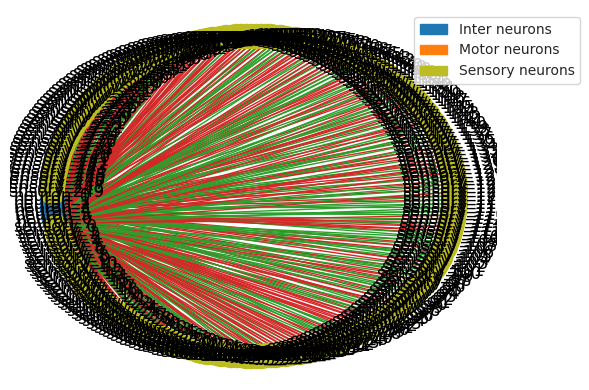

In [25]:
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(6, 4))
legend_handles = wiring.draw_graph(draw_labels=True)
plt.legend(handles=legend_handles, loc="upper center", bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [4]:
gemini.load_weights('gemini/models/gemini.h5')
forex_data_m1 =pd.read_csv("final_complete_m1short_timestep_4.csv")


In [18]:
from collections import deque
class ForexCustomEnv:
    def __init__(self, m1short, chart_decorator):
        self.dataset_directory = "M1M5Charts/"
        self.account_balance = 1000
        self.m1short = m1short
        self.chart_decorator = chart_decorator
        self.prev_trade = deque(maxlen=4)
        self.current_step = 3099
        self.position = -1

    def get_ask_bid_lines(self, image_path):
        ask_bid_lines = {"ask_line":None, "bid_line":None, "key": 0}
        img = Image.open(f"{self.dataset_directory}{image_path}")
        img_data = np.array(img)
        last_part = Image.fromarray(img_data[:,200:201,:])
        img1_pixels = last_part.load()
        ask_color = (255,0,0)
        bid_color = (119, 136, 153)
        for y in range(224):
            if img1_pixels[0,y] == ask_color:
                ask_bid_lines["ask_line"] = y
            if img1_pixels[0,y] == bid_color:
                ask_bid_lines["bid_line"] = y
        if ask_bid_lines["ask_line"] == None:
            ask_bid_lines["ask_line"] = ask_bid_lines["bid_line"] + 3
            ask_bid_lines["bid_line"] = ask_bid_lines["bid_line"] + 6
        return ask_bid_lines , img  
    def draw_collection(self, image):
        #pass
        display(image)
    def draw_buy_bar(self, current_image, start_lines, end_lines, position = None, profit=0, prev_trade=None, account_balance=1000):
        return self.chart_decorator.draw_buy_bar(current_image, start_lines, end_lines, position, profit, prev_trade, account_balance)
    def step(self, current_trade):
        image_path = self.m1short.iloc[ current_trade["step" ]]["image_path"]
        ask_bid_lines , img = self.get_ask_bid_lines(image_path) 
        if current_trade["current_ask_bid_lines"]  == 0:
            _image = self.draw_buy_bar(img,  ask_bid_lines, ask_bid_lines, current_trade["_position"], current_trade["profit"], current_trade["prev_trade"], current_trade["account_balance"])
        else:
            _image = self.draw_buy_bar(img,  current_trade["parent_ask_bid_lines"], ask_bid_lines, current_trade["_position"], current_trade["profit"], current_trade["prev_trade"], current_trade["account_balance"])
        self.draw_collection(_image)
        return ask_bid_lines

In [19]:
from forex_utils import ChartDecorator

In [20]:
chart_decorator = ChartDecorator()
env   =  ForexCustomEnv(forex_data_m1, chart_decorator)

In [ ]:
from PIL import Image
counter = 3099 #start of testing dataset
_position = -1
current_trade = {}
total_profit = 0
account_balance = 1000
def trade(entry_price, current_price, position, step):
    current_trade = {}
    current_trade["entry_price"] = entry_price
    current_trade["current_price"] = current_price
    current_trade["_position"] = position
    current_trade["profit"] = 0
    current_trade["current_ask_bid_lines"] = 0
    current_trade["parent_ask_bid_lines"] = 0
    current_trade["step"] = step
    current_trade["prev_trade"] = deque(maxlen=4)
    current_trade["prev_trade"].append(-1)
    current_trade["prev_trade"].append(-1)
    current_trade["prev_trade"].append(-1)
    current_trade["prev_trade"].append(-1)
    current_trade["prev_trade"].append(_position)
    current_trade["account_balance"] = account_balance
    current_trade["parent_ask_bid_lines"] = env.step(current_trade)
    
    return current_trade
for i in range(99, 6804):
    ask = forex_data_m1.iloc[counter]["Ask"]
    bid = forex_data_m1.iloc[counter]["Bid"]
    _x = stacked_test_feature[0][i]
    _x = _x.reshape(1,1,len(_x))
    pred = gemini.predict(_x,verbose=0)[0][0][0]
    # print(i, pred)
    if _position == -1:
        if pred < 0.9:#open buy
            _position = 0
            current_trade = trade(float(forex_data_m1.iloc[counter]["Ask"]), float(forex_data_m1.iloc[counter]["Ask"]),_position, counter)
            # print("Buy Opened")
            print("Buy Opened", current_trade)
        else:#open sell
            _position = 1
            current_trade = trade(float(forex_data_m1.iloc[counter]["Bid"]), float(forex_data_m1.iloc[counter]["Bid"]),_position, counter)
            print(current_trade)
            print("Sell Opened", current_trade)
    elif _position == 0 and pred < 0.8:#buy position continues
        current_trade["current_price"] = float(forex_data_m1.iloc[counter]["Bid"])
        current_trade["profit"] = current_trade["current_price"] - current_trade["entry_price"]
        current_trade["step"] = counter
        current_trade["prev_trade"].append(_position)
        current_trade["current_ask_bid_lines"]=env.step(current_trade)
        print(f"Buy Continues Profit {current_trade}")
        
    elif _position == 1 and pred >= 0.8:#sell position continues
        current_trade["profit"] = current_trade["entry_price"] - current_trade["current_price"]
        current_trade["current_price"] = float(forex_data_m1.iloc[counter]["Ask"])
        current_trade["step"] = counter
        current_trade["prev_trade"].append(_position)
        current_trade["current_ask_bid_lines"]=env.step(current_trade)
        
        print(f"Sell Continues Profit {current_trade}")
    elif _position == 0 and pred >= 0.8:#close buy position calculate profit and open sell position
        profit = current_trade["current_price"] - current_trade["entry_price"]
        _position = -1
        total_profit+=profit
        account_balance += profit * 1 * 0.2
        current_trade["profit"]=profit
        current_trade["step"] = counter
        current_trade["prev_trade"].append(_position)
        current_trade["account_balance"] = account_balance
        current_trade["current_ask_bid_lines"]=env.step(current_trade)
        
        print(f"Buy Closed probs {pred} Total Profits {total_profit} account_balance {account_balance}")
        print(current_trade)
    elif _position == 1 and pred < 0.8: # close sell position calculate profit and close sell pos
        _position = -1
        
        total_profit += profit
        account_balance += profit * 1 * 0.2
        print(f"Sell Closed probs {pred}Total Profits {total_profit} account_balance {account_balance}")
        print(current_trade)
        
        current_trade["profit"] = profit
        current_trade["step"] = counter
        current_trade["prev_trade"].append(_position)
        current_trade["account_balance"] = account_balance
        current_trade["current_ask_bid_lines"]=env.step(current_trade)        

    
    counter += 1
    # break

In [ ]:
counter = 3099 #start of testing dataset
_position = -1
current_trade = {}
total_profit = 0
account_balance = 50
def trade(entry_price, current_price, _position, step):
    current_trade = {}
    current_trade["entry_price"] = entry_price
    current_trade["current_price"] = current_price
    current_trade["_position"] = _position
    current_trade["profit"] = 0
    current_trade["current_ask_lines"] = 0
    current_trade["parent_ask_lines"] = 0
    current_trade["step"] = step
    current_trade["prev_trade"] = deque(maxlen=4)
    current_trade["prev_trade"].append(_position)
    current_trade["account_balance"] = account_balance
    current_trade["parent_ask_lines"] = env.step(step, 0, 0, position, profit, prev_trade)
    
    return current_trade
for i in range(99, 6804):
    ask = forex_data_m1.iloc[counter]["Ask"]
    bid = forex_data_m1.iloc[counter]["Bid"]
    _x = stacked_test_feature[0][i]
    _x = _x.reshape(1,1,len(_x))
    pred = gemini.predict(_x,verbose=0)[0][0][0]
    # print(i, pred)
    if _position == -1:
        if pred < 0.9:#open buy
            _position = 0
            current_trade = trade(float(forex_data_m1.iloc[counter]["Ask"]), float(forex_data_m1.iloc[counter]["Bid"]),_position)
            # print("Buy Opened")
        else:#open sell
            _position = 1
            current_trade = trade(float(forex_data_m1.iloc[counter]["Bid"]), float(forex_data_m1.iloc[counter]["Ask"]),_position)
            # print("Sell Opened")
    elif _position == 0 and pred < 0.9:#buy position continues
        current_trade["current_price"] = float(forex_data_m1.iloc[counter]["Bid"])
        current_trade["profit"] = current_trade["current_price"] - current_trade["entry_price"]
        current_trade["step"] = i
        current_trade["prev_trade"].append(_position)
        current_trade["current_ask_bid_lines"]=env.step(current_trade)
        # print(f"Buy Continues Profit {profit}")
        
    elif _position == 1 and pred >= 0.9:#sell position continues
        current_trade["profit"] = current_trade["entry_price"] - current_trade["current_price"]
        current_trade["current_price"] = float(forex_data_m1.iloc[counter]["Ask"])
        current_trade["step"] = i
        current_trade["prev_trade"].append(_position)
        current_trade["current_ask_bid_lines"]=env.step(current_trade)
        
        # print(f"Sell Continues Profit {profit}")
    elif _position == 0 and pred >= 0.9:#close buy position calculate profit and open sell position
        profit = current_trade["current_price"] - current_trade["entry_price"]
        _position = -1
        total_profit+=profit
        account_balance += profit * 10 * 0.5
        current_trade["profit"]
        current_trade["step"] = i
        current_trade["prev_trade"].append(_position)
        current_trade["account_balance"] = account_balance
        current_trade["current_ask_bid_lines"]=env.step(current_trade)
        
        print(f"Buy Closed probs {pred} Total Profits {total_profit} account_balance {account_balance}")
        
    elif _position == 1 and pred < 0.9: # close sell position calculate profit and close sell pos
        _position = -1
        
        total_profit += profit
        account_balance += profit * 10 * 0.5
        print(f"Sell Closed probs {pred}Total Profits {total_profit} account_balance {account_balance}")
        
        current_trade["profit"]
        current_trade["step"] = i
        current_trade["prev_trade"].append(_position)
        current_trade["account_balance"] = account_balance
        current_trade["current_ask_bid_lines"]=env.step(current_trade)        

    
    counter += 1
    # break

In [9]:
forex_data_m1.iloc[9800][:]

TimeStamp                                        2023.04.12-03:02:34
image_path         Volatility_100_Index_M1_1158233112023.04.12-03...
Open                                                         7060.61
Close                                                        7058.33
High                                                         7060.88
Low                                                          7056.59
Ask                                                           7060.0
Bid                                                          7058.33
MA 5                                                        7057.524
MA 8                                                       7057.6562
MA 10                                                       7059.213
MA 14                                                      7064.9936
MA 18                                                      7073.2272
MA 24                                                       7083.935
MA 30                             